In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')
os.environ['DATA_PATH'] = '/cluster/home/bdayan/girgs/FE_FB_chunglu_with_tau/'

import pandas as pd
pd.set_option('display.max_rows', 100)

import scipy
import seaborn as sns
import sys
sys.path.append('../nemo-eva/src/')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
DP = os.environ['DATA_PATH']
all_df = pd.read_csv(DP + '4-classification_results/accuracies/all_1d_base.csv').T
# small_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-le-30.csv').T
# large_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-gt-30.csv').T
# socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/socfb.csv').T
# not_socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/not-socfb.csv').T
# for df in [all_df, small_deg_df, large_deg_df, socfb_df, not_socfb_df]:
for df in [all_df]:
    df.columns = df.iloc[0]
    df.drop(df.index[0], inplace=True)
    # df.reset_index(inplace=True)
    df['~features'] = df.index
    # df.drop(columns=['index'], inplace=True)

all_df = all_df.reindex(sorted(all_df.columns), axis=1)

In [11]:
df = pd.read_csv(DP + '3-cleaned_features/results.csv')
df.Info = df.Info.apply(lambda temp: {key: var for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

In [24]:
df.loc[df.Model == '2d-cube-girg'].loc[:, ['Graph', 'alpha']]

,Graph,alpha
13,socfb-Colgate88,1.24031007751938
44,socfb-Brown11,1.194921583271098
75,socfb-Indiana,1.2643224022125643
106,socfb-Swarthmore42,1.24031007751938
137,socfb-UCLA26,1.2766806303610614
...,...,...
3020,socfb-Howard90,1.1376766509643588
3051,socfb-CMU,1.35621953803772
3082,socfb-Bucknell39,1.3021363173957274
3113,socfb-Temple83,1.2522011348072783


In [34]:
df.loc[df.Model == 'real-world'].sort_values('Nodes').loc[:, ['Graph', 'Nodes', 'Centrality.Degree.Location.Arithmetic Mean']]

,Graph,Nodes,Centrality.Degree.Location.Arithmetic Mean
2977,socfb-Caltech36,762,43.703412
1365,socfb-Reed98,962,39.110187
156,socfb-Haverford76,1446,82.419087
900,socfb-Simmons81,1510,43.687417
94,socfb-Swarthmore42,1657,73.686180
...,...,...,...
466,socfb-UIllinois,30795,82.118591
2419,socfb-UIllinois20,30795,82.118591
1985,socfb-Texas80,31538,77.344093
2450,socfb-MSU24,32361,69.142919


<AxesSubplot:xlabel='Nodes', ylabel='Centrality.Degree.Location.Arithmetic Mean'>

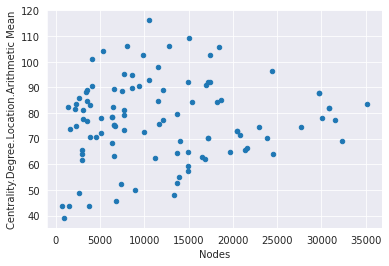

In [35]:
df.loc[df.Model == 'real-world'].plot(x='Nodes', y='Centrality.Degree.Location.Arithmetic Mean', kind='scatter')

In [36]:
df.loc[df.Model == 'real-world', 'Centrality.Degree.Location.Arithmetic Mean'].mean()

77.12470879690576

In [38]:
import numpy as np

np.corrcoef(df.loc[df.Model == 'real-world', 'Nodes'], df.loc[df.Model == 'real-world', 'Centrality.Degree.Location.Arithmetic Mean'])

array([[1.        , 0.10507406],
       [0.10507406, 1.        ]])

In [6]:
indices = sorted([x for x in all_df.index if x[-4:] == 'mean'])
indices = [x for x in indices if not 'Partition' in x]
indices

['Betweenness,Closeness,Diameter Max - mean',
 'Betweenness,Closeness,Effective Diameter - mean',
 'ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - mean',
 'ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean',
 'Nodes,Edges - mean',
 'Nodes,Edges,Betweenness - mean',
 'Nodes,Edges,Betweenness,Closeness,Diameter Max - mean',
 'Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean',
 'Nodes,Edges,Centrality.CoreDecomposition - mean',
 'Nodes,Edges,Centrality.CoreDecomposition,ClusteringCoefficient - mean',
 'Nodes,Edges,Centrality.CoreDecomposition,Degree - mean',
 'Nodes,Edges,Closeness - mean',
 'Nodes,Edges,Closeness,ClusteringCoefficient - mean',
 'Nodes,Edges,Closeness,Degree - mean',
 'Nodes,Edges,ClusteringCoefficient - mean',
 'Nodes,Edges,ClusteringCoefficient,Betweenness - mean',
 'Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha - mean',
 'Nodes,Edges,ClusteringCoefficient,Degree Distribution.Pow

In [15]:
columns = """1d-copyweight-girg	2d-copyweight-girg	3d-copyweight-girg	4d-copyweight-girg	5d-copyweight-girg	chung-lu	1-2-34-mixed-girg	1-23-mixed-girg	1-234-mixed-girg	12-34-mixed-girg	2d-min-girg	3d-min-girg	4d-min-girg	5d-min-girg	1d-cube-girg	2d-cube-girg	3d-cube-girg\t1d-girg	2d-girg	3d-girg	4d-girg	5d-girg	6d-girg	7d-girg\thyperbolic\tchung-lu-tau\tBA full	ER""".split('\t')

columns = """1d-copyweight-girg	2d-copyweight-girg	3d-copyweight-girg	4d-copyweight-girg	5d-copyweight-girg	chung-lu	1-2-34-mixed-girg	1-23-mixed-girg	1-234-mixed-girg	12-34-mixed-girg	2d-min-girg	3d-min-girg	4d-min-girg	5d-min-girg	1d-cube-girg	2d-cube-girg	3d-cube-girg\t2d-girg	3d-girg	4d-girg	5d-girg	6d-girg	7d-girg\thyperbolic\tchung-lu-tau\tBA full\tER\treal-world""".split('\t')
columns

['1d-copyweight-girg',
 '2d-copyweight-girg',
 '3d-copyweight-girg',
 '4d-copyweight-girg',
 '5d-copyweight-girg',
 'chung-lu',
 '1-2-34-mixed-girg',
 '1-23-mixed-girg',
 '1-234-mixed-girg',
 '12-34-mixed-girg',
 '2d-min-girg',
 '3d-min-girg',
 '4d-min-girg',
 '5d-min-girg',
 '1d-cube-girg',
 '2d-cube-girg',
 '3d-cube-girg',
 '2d-girg',
 '3d-girg',
 '4d-girg',
 '5d-girg',
 '6d-girg',
 '7d-girg',
 'hyperbolic',
 'chung-lu-tau',
 'BA full',
 'ER',
 'real-world']

In [16]:
'real-world' in all_df.columns

True

In [17]:
columns2 = ['1ccu', '2ccu', '3ccu', '4ccu', '5ccu', 'CL-c', '1-23', '1-234', '12-34', '1-2-34', '2m', '3m', '4m', '5m', '1cu', '2cu', '3cu', '2d', '3d', '4d', '5d', '6d', '7d', 'hyper', 'CL', 'BA', 'ER', 'real-world']

{a:b for a, b in zip(columns, columns2)}

{'1d-copyweight-girg': '1ccu',
 '2d-copyweight-girg': '2ccu',
 '3d-copyweight-girg': '3ccu',
 '4d-copyweight-girg': '4ccu',
 '5d-copyweight-girg': '5ccu',
 'chung-lu': 'CL-c',
 '1-2-34-mixed-girg': '1-23',
 '1-23-mixed-girg': '1-234',
 '1-234-mixed-girg': '12-34',
 '12-34-mixed-girg': '1-2-34',
 '2d-min-girg': '2m',
 '3d-min-girg': '3m',
 '4d-min-girg': '4m',
 '5d-min-girg': '5m',
 '1d-cube-girg': '1cu',
 '2d-cube-girg': '2cu',
 '3d-cube-girg': '3cu',
 '2d-girg': '2d',
 '3d-girg': '3d',
 '4d-girg': '4d',
 '5d-girg': '5d',
 '6d-girg': '6d',
 '7d-girg': '7d',
 'hyperbolic': 'hyper',
 'chung-lu-tau': 'CL',
 'BA full': 'BA',
 'ER': 'ER',
 'real-world': 'real-world'}

In [18]:
out_df = all_df.reindex(columns=columns).rename(columns={a:b for a, b in zip(columns, columns2)}).loc[indices]
out_df.to_csv('blasius_mean_1d.csv', index=False)

In [20]:
out_df.columns

Index(['1ccu', '2ccu', '3ccu', '4ccu', '5ccu', 'CL-c', '1-23', '1-234',
       '12-34', '1-2-34', '2m', '3m', '4m', '5m', '1cu', '2cu', '3cu', '2d',
       '3d', '4d', '5d', '6d', '7d', 'hyper', 'CL', 'BA', 'ER', 'real-world'],
      dtype='object', name='features')

In [12]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [37]:
columns

['1d-copyweight-girg',
 '2d-copyweight-girg',
 '3d-copyweight-girg',
 '4d-copyweight-girg',
 '5d-copyweight-girg',
 'chung-lu',
 '1-2-34-mixed-girg',
 '1-23-mixed-girg',
 '1-234-mixed-girg',
 '12-34-mixed-girg',
 '2d-min-girg',
 '3d-min-girg',
 '4d-min-girg',
 '5d-min-girg',
 '1d-cube-girg',
 '2d-cube-girg',
 '3d-cube-girg',
 '1d-girg',
 '2d-girg',
 '3d-girg',
 '4d-girg',
 '5d-girg',
 '6d-girg',
 '7d-girg',
 'chung-lu-tau',
 'BA full',
 'ER',
 'hyperbolic']

In [32]:
all_df.columns

Index(['1-2-34-mixed-girg', '1-23-mixed-girg', '1-234-mixed-girg',
       '12-34-mixed-girg', '1d-copyweight-girg', '1d-cube-girg', '1d-girg',
       '1d-min-girg', '2d-copyweight-girg', '2d-cube-girg', '2d-girg',
       '2d-min-girg', '3d-copyweight-girg', '3d-cube-girg', '3d-girg',
       '3d-min-girg', '4d-copyweight-girg', '4d-girg', '4d-min-girg',
       '5d-copyweight-girg', '5d-girg', '5d-min-girg', '6d-girg', '7d-girg',
       'BA circle', 'BA full', 'ER', 'chung-lu', 'chung-lu-tau', 'hyperbolic',
       '~features'],
      dtype='object', name='features')

In [13]:
print('\n'.join(indices))

Betweenness,Closeness,Diameter Max - mean
Betweenness,Closeness,Effective Diameter - mean
ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - mean
ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean
Nodes,Edges - mean
Nodes,Edges,Betweenness - mean
Nodes,Edges,Betweenness,Closeness,Diameter Max - mean
Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean
Nodes,Edges,Centrality.CoreDecomposition - mean
Nodes,Edges,Centrality.CoreDecomposition,ClusteringCoefficient - mean
Nodes,Edges,Centrality.CoreDecomposition,Degree - mean
Nodes,Edges,Closeness - mean
Nodes,Edges,Closeness,ClusteringCoefficient - mean
Nodes,Edges,Closeness,Degree - mean
Nodes,Edges,ClusteringCoefficient - mean
Nodes,Edges,ClusteringCoefficient,Betweenness - mean
Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha - mean
Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - mean
Nodes,Edges,ClusteringCoefficient,Degr

In [27]:
temp = '0.931372549019608,0.9460784313725491,0.9705882352941176,0.9509803921568628,0.9411764705882352,0.9901960784313726,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9950980392156864,0.9950980392156864,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,,1.0,1.0'
temp = temp.split(',')
len(temp)

28

In [28]:
len(columns)

28

In [39]:
temp = '1ccu,2ccu,3ccu,4ccu,5ccu,CL-c,1-23,1-234,12-34,1-2-34,2m,3m,4m,5m,1cu,2cu,3cu,1d,2d,3d,4d,5d,6d,7d,CL,BA,ER,hyper'
len(temp.split(','))

28

In [40]:
temp2='0.5294117647058824,0.5098039215686274,0.5343137254901961,0.5245098039215687,0.5245098039215687,0.5343137254901961,0.5196078431372549,0.5098039215686274,0.5098039215686274,0.5098039215686274,0.5196078431372549,0.5441176470588235,0.5588235294117647,0.5294117647058824,0.5294117647058824,0.5147058823529411,0.5147058823529411,0.5049019607843137,0.5049019607843137,0.5049019607843137,0.5049019607843137,0.5196078431372549,0.5343137254901961,0.5294117647058824,0.5,0.5196078431372549,0.5049019607843137,0.5588235294117647'
temp2 = temp2.split(',')
len(temp2)

28

In [41]:
',,' in temp2

False

In [42]:
temp.replace(',', ' ')

'1ccu 2ccu 3ccu 4ccu 5ccu CL-c 1-23 1-234 12-34 1-2-34 2m 3m 4m 5m 1cu 2cu 3cu 1d 2d 3d 4d 5d 6d 7d CL BA ER hyper'